In [26]:
import tkinter as tk
import sklearn
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import BaggingClassifier
from time import time
from IPython.display import display
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatche
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import seaborn as sns


In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#這是如果已經下載到你自己的電腦
data = pd.read_csv('OnlineNewsPopularity.csv')
ONP = data.drop(columns=['url',' timedelta'])
ONP.columns = ONP.columns.str.replace(" ","")
con_df = ONP[ONP['n_tokens_content']!=0]

In [4]:
clean_df = con_df.drop(columns=['data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed',
                 'data_channel_is_tech', 'data_channel_is_world', 'data_channel_is_lifestyle',
                 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
                 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend'])
clean_df['share_2_ca'] = con_df['shares'].apply(lambda x: 0 if x <= 2000 else 1)
data=clean_df

In [5]:
from sklearn.preprocessing import StandardScaler
modelscore=[]
X=clean_df.drop(['share_2_ca','shares','kw_min_min'],axis=1)
y=clean_df['share_2_ca']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

第零個介面 變數的直方圖和敘述性統計

In [27]:
def create_tab0_interface(tab):
    # 輸入要哪個連續型變數
    def plot_hist(column):
        # 畫出這個變數的直方圖
        ax.clear()
        ax.hist(data[column], bins = 20)
        ax.set_xlim([data[column].min(), data[column].max()])
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.set_title('Histogram of \" ' + column + ' \"', fontsize = 10)
        # 讓圖的大小符合canvas的大小
        plt.tight_layout()
        canvas_1.draw()
        # 使用label的方式print出這個變數的敘述性統計
        label = tk.Label(tab, text = data[column].describe())
        label.grid(row = 3, column = 0, columnspan=3)

    # 繪製該變數和share_2_ca的關係，用盒鬚圖
    def plot_box(column):
        ax.clear()
        sns.boxplot(x='share_2_ca', y=column, data=data, ax=ax, hue='share_2_ca', palette='Set2', hue_order=[0, 1])
        # 修改圖例標籤
        handles, labels = ax.get_legend_handles_labels()
        labels = ['Unpopular', 'Popular']
        ax.legend(handles, labels, loc = 'upper left',fontsize = 'small')
        ax.set_title('Boxplot of \" ' + column + ' \" by \" share_2_ca \"', fontsize = 10)
        canvas_2.draw()


    data_box = data.drop(['shares','share_2_ca'], axis = 1)
    label1 = tk.Label(tab, text = 'Choose a continuous variable: ')
    label1.grid(row=0, column=0, pady = 10, padx = 100)
    variable = tk.StringVar(tab)
    variable.set(list(data_box.keys())[0])
    optionmenu = ttk.OptionMenu(tab, variable, 'n_tokens_title', *list(data_box.keys()))
    optionmenu.grid(row=0, column=1, padx = 80, pady = 10)



    fig, ax = plt.subplots(figsize = (5.5, 4))
    # plt.tight_layout()
    canvas_1 = FigureCanvasTkAgg(fig, master = tab)
    canvas_1.get_tk_widget().grid(row = 2, column = 0, pady = 10)

    canvas_2 = FigureCanvasTkAgg(fig, master = tab)
    canvas_2.get_tk_widget().grid(row = 2, column = 1, pady = 10, columnspan = 2)

    button = tk.Button(tab, text = 'Plot Historgram and Boxplot', command = lambda: plot_hist(variable.get())+plot_box(variable.get()))
    button.grid(row=1, column=0, columnspan=3)

第一個介面 X範圍有預設值 也可以單一輸入一個邊界

In [7]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def create_tab1_interface(tab):
    def plot_scatter(x_lim_, x_lim):
        x_var = variable_x.get()
        y_var = variable_y.get()

        x_data = data[x_var]
        y_data = data[y_var]

        ax.clear()
        ax.scatter(x_data, y_data)
        ax.set_xlabel(x_var)
        ax.set_ylabel(y_var)
        ax.set_title("Scatter Plot")
        ax.set_xlim(x_lim_, x_lim)
        canvas.draw()

    def get_numbers(): # x_lim_、x_lim 數字
        x_lim_ = entry1.get()
        x_lim = entry2.get()

        # 检查输入框是否都为空
        if not x_lim_ and not x_lim:
            # 使用默认的 X 轴范围
            x_lim_ = min(data[variable_x.get()])-0.03*(max(data[variable_x.get()])-min(data[variable_x.get()]))
            x_lim = max(data[variable_x.get()])+0.03*(max(data[variable_x.get()])-min(data[variable_x.get()]))
        elif x_lim_ and x_lim:
            # 使用输入的值作为 X 轴范围
            x_lim_ = float(x_lim_)
            x_lim = float(x_lim)
        elif x_lim_:
            # 只有一个输入框有值，使用默认值或者该输入的值
            x_lim_ = float(x_lim_)
            x_lim = max(data[variable_x.get()])+0.03*(max(data[variable_x.get()])-min(data[variable_x.get()])) if not x_lim else int(x_lim)
        elif x_lim:
            # 只有一个输入框有值，使用默认值或者该输入的值
            x_lim = float(x_lim)
            x_lim_ = min(data[variable_x.get()])-0.03*(max(data[variable_x.get()])-min(data[variable_x.get()])) if not x_lim_ else int(x_lim_)

        plot_scatter(x_lim_, x_lim)

    label3 = tk.Label(tab, text="variable 1 :")
    label3.grid(row=0, column=0, padx=50, pady=5, sticky=tk.W)

    label4 = tk.Label(tab, text="variable 2 :")
    label4.grid(row=1, column=0, padx=50, pady=5, sticky=tk.W)

    label1 = tk.Label(tab, text="X Lower Bound:") # 設定 x_lim_ 的label
    label1.grid(row=2, column=0, padx=50, pady=5, sticky=tk.W)   # 位置

    label2 = tk.Label(tab, text="X Upper Bound:")
    label2.grid(row=3, column=0, padx=50, pady=5, sticky=tk.W)

    entry1 = tk.Entry(tab) # 輸入格
    entry1.grid(row=2, column=1) # 輸入格位置

    entry2 = tk.Entry(tab)
    entry2.grid(row=3, column=1)

    variable_x = tk.StringVar(tab)
    variable_y = tk.StringVar(tab)
    variable_x.set(list(data.keys())[0])
    variable_y.set(list(data.keys())[1])
    optionmenu_x = ttk.OptionMenu(tab, variable_x, *list(data.keys())) # X 變數選項
    optionmenu_y = ttk.OptionMenu(tab, variable_y, *list(data.keys())) # Y 變數選項
    optionmenu_x.grid(row=0, column=1)
    optionmenu_y.grid(row=1, column=1)

    button = tk.Button(tab, text="Plot Scatter", command=get_numbers)
    button.grid(row=4, column=0, columnspan=2)  # 将按钮放置在第四行并横跨两列

    fig, ax = plt.subplots(figsize=(6, 4))
    canvas = FigureCanvasTkAgg(fig, master=tab)
    canvas.draw()
    canvas.get_tk_widget().grid(row=5, columnspan=2)  # 放置图表并横跨两列

第二個標籤_類別長條圖

In [8]:
#第二個標籤
def create_tab2_interface(tab):
    def plot_bar():
        a = 2000
        Unpopular = con_df[con_df['shares'] < a]
        Popular = con_df[con_df['shares'] >= a]
        if variable.get() == 'weekday':
            day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            WeekDay = con_df.columns.values[29:36]
            Unpopular = Unpopular[WeekDay].sum().values
            Popular = Popular[WeekDay].sum().values
            x = day
            title = "Count of popular/unpopular news over different day of week"
        else:
            channel = ['lifestyle', 'entertainment', 'business', 'socmed', 'tech', 'world']
            channels = con_df.columns[11:17]
            Unpopular = Unpopular[channels].sum().values
            Popular = Popular[channels].sum().values
            x = channel
            title = "Count of popular/unpopular news over different data channel"

        ax.clear()
        ax.bar(np.arange(len(x)), Popular, width=0.3, align='center', color='#81C0C0', label='Popular')
        ax.bar(np.arange(len(x)) - 0.3, Unpopular, width=0.3, align='center', color='#FF9797', label='Unpopular')
        ax.set_xticks(np.arange(len(x)))
        ax.set_xticklabels(x)
        ax.set_ylabel('Count', fontsize=15)
        ax.set_title(title, fontsize=16)
        ax.legend(loc='upper right')
        canvas.draw()

    variable = tk.StringVar(tab)
    variable.set('weekday')
    optionmenu = ttk.OptionMenu(tab, variable, 'weekday', 'weekday', 'channel')
    plot_button = ttk.Button(tab, text="Plot Bar", command=plot_bar)

    fig, ax = plt.subplots(figsize=(8, 5))
    canvas = FigureCanvasTkAgg(fig, master=tab)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

    optionmenu.pack(padx=10, pady=5)
    plot_button.pack(padx=10, pady=5)


第三個標籤_xgboost模型配適

In [21]:
# 第三個標籤
def create_tab3_interface(parent):
    param_labels = ["max_depth", "learning_rate", "n_estimators"]  # 參數名稱

    max_depth_label = ttk.Label(parent, text="Max Depth:")
    max_depth_label.grid(column=0, row=0, padx=5, pady=5)
    max_depth_combobox = ttk.Combobox(parent, values=[2, 3, 4, 5, 6])
    max_depth_combobox.grid(column=1, row=0, padx=5, pady=5)
    max_depth_combobox.current(0)

    learning_rate_label = ttk.Label(parent, text="Learning Rate:")
    learning_rate_combobox = ttk.Combobox(parent, values=[0.1, 0.01])
    learning_rate_label.grid(row=1, column=0, padx=5, pady=5)
    learning_rate_combobox.grid(row=1, column=1)
    learning_rate_combobox.current(0)

    n_estimators_label = ttk.Label(parent, text="Number of Estimators:")
    n_estimators_combobox = ttk.Combobox(parent, values=[50, 100, 200, 300, 1000])
    n_estimators_label.grid(row=2, column=0, padx=5, pady=5)
    n_estimators_combobox.grid(row=2, column=1)
    n_estimators_combobox.current(0)

    test_size_label = ttk.Label(parent, text="Test Size:")
    test_size_label.grid(column=0, row=3, padx=5, pady=5)
    test_size_scale = tk.Scale(parent, from_=0.1, to=0.5, resolution=0.1, orient=tk.HORIZONTAL)
    test_size_scale.set(0.2)
    test_size_scale.grid(column=1, row=3, padx=5, pady=5)

    result_label = ttk.Label(parent, text="")
    result_label.grid(column=0, row=4, columnspan=2, padx=5, pady=5)

    def train_model_class():
        params = {
            "max_depth": int(max_depth_combobox.get()),
            "learning_rate": float(learning_rate_combobox.get()),
            "n_estimators": int(n_estimators_combobox.get())
        }
        X = clean_df.drop(['share_2_ca', 'shares', 'kw_min_min'], axis=1)
        y = clean_df['share_2_ca']

        test_size = test_size_scale.get()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=100)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = xgb.XGBClassifier(**params)
        model.fit(X_train_scaled, y_train)

        # 預測
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

        # 計算準確率和F1分數
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # 計算ROC曲線資料
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        result_label.config(text=f"Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}")

        # Plot ROC Curve
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('Receiver Operating Characteristic')
        ax.legend(loc="lower right")

        canvas = FigureCanvasTkAgg(fig, master=parent)
        canvas.draw()
        canvas.get_tk_widget().grid(column=2, row=0, rowspan=8, padx=5, pady=5)

    train_button = ttk.Button(parent, text="Train XGBoost Model", command=train_model_class)
    train_button.grid(columnspan=2, row=5, padx=5, pady=5)



第四個標籤_變數重要性

In [20]:
# 第四個標籤
def create_tab4_interface(parent):
    param_labels = ["max_depth", "learning_rate", "n_estimators"]  # 參數名稱

    max_depth_label = ttk.Label(parent, text="Max Depth:")
    max_depth_label.grid(column=0, row=0, padx=5, pady=5)
    max_depth_combobox = ttk.Combobox(parent, values=[2, 3, 4, 5, 6])
    max_depth_combobox.grid(column=1, row=0, padx=5, pady=5)
    max_depth_combobox.current(0)

    learning_rate_label = ttk.Label(parent, text="Learning Rate:")
    learning_rate_combobox = ttk.Combobox(parent, values=[0.1, 0.01])
    learning_rate_label.grid(row=1, column=0, padx=5, pady=5)
    learning_rate_combobox.grid(row=1, column=1)
    learning_rate_combobox.current(0)

    n_estimators_label = ttk.Label(parent, text="Number of Estimators:")
    n_estimators_combobox = ttk.Combobox(parent, values=[50, 100, 200, 300, 1000])
    n_estimators_label.grid(row=2, column=0, padx=5, pady=5)
    n_estimators_combobox.grid(row=2, column=1)
    n_estimators_combobox.current(0)

    test_size_label = ttk.Label(parent, text="Test Size:")
    test_size_label.grid(column=0, row=3, padx=5, pady=5)
    test_size_scale = tk.Scale(parent, from_=0.1, to=0.5, resolution=0.1, orient=tk.HORIZONTAL)
    test_size_scale.set(0.2)
    test_size_scale.grid(column=1, row=3, padx=5, pady=5)

    result_label = ttk.Label(parent, text="")
    result_label.grid(column=0, row=4, columnspan=2, padx=5, pady=5)

    def train_model():
        params = {
            "max_depth": int(max_depth_combobox.get()),
            "learning_rate": float(learning_rate_combobox.get()),
            "n_estimators": int(n_estimators_combobox.get())
        }

        test_size = test_size_scale.get()

        X = clean_df.drop(['share_2_ca', 'shares', 'kw_min_min'], axis=1)
        y = clean_df['share_2_ca']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=100)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = xgb.XGBClassifier(**params)
        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        result_label.config(text=f"Accuracy: {accuracy:.2f}")

        # 獲取特徵重要性分數
        feature_importance = model.feature_importances_
        feature_names = X_train.columns.tolist()

        # 將特徵名稱與重要性分數配對並排序
        features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)
        feature_names = [x[0] for x in features]
        scores = [x[1] for x in features]
        feature_indices = range(len(feature_names))

        # 在 Axes 對象上繪製水平條形圖
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.barh(feature_indices, scores, align='center')
        ax.set_yticks(feature_indices)
        ax.set_yticklabels(feature_names, fontsize=7)
        ax.invert_yaxis()  # 反轉 y 軸
        ax.set_xlabel('Feature Importance Score')
        ax.set_title('Feature Importance Scores (XGBoost)')

        # 將 Matplotlib 圖形嵌入 Tkinter 介面
        canvas = FigureCanvasTkAgg(fig, master=parent)
        canvas.draw()
        canvas.get_tk_widget().grid(column=2, row=0, rowspan=16, padx=5, pady=5)

    train_button = ttk.Button(parent, text="Train XGBoost Model", command=train_model)
    train_button.grid(columnspan=2, row=5, padx=5, pady=5)

第五個標籤_預測新聞是否受歡迎

In [11]:
def create_tab5_interface(parent):
    input_labels = list(data.columns)[:-2]
    input_entries = []
    for i, label in enumerate(input_labels):
        # 使label和entry變成 10*5 的網格
        ttk.Label(parent, text=label).grid(row=i%15, column=2*(i//15), padx=5, pady=5)
        entry = ttk.Entry(parent)
        entry.grid(row=i%15, column=2*(i//15) + 1, padx=5, pady=5)
        input_entries.append(entry)

    param_labels = ["max_depth", "learning_rate", "n_estimators"]  # 參數名稱

    max_depth_label = ttk.Label(parent, text="Max Depth:")
    max_depth_label.grid(column=6, row=0, padx=5, pady=5)
    max_depth_combobox = ttk.Combobox(parent, values=[2, 3, 4, 5, 6])
    max_depth_combobox.grid(column=7, row=0, padx=5, pady=5)
    max_depth_combobox.current(0)

    learning_rate_label = ttk.Label(parent, text="Learning Rate:")
    learning_rate_combobox = ttk.Combobox(parent, values=[0.1, 0.01])
    learning_rate_label.grid(row=1, column=6, padx=5, pady=5)
    learning_rate_combobox.grid(row=1, column=7)
    learning_rate_combobox.current(0)

    n_estimators_label = ttk.Label(parent, text="Number of Estimators:")
    n_estimators_combobox = ttk.Combobox(parent, values=[50, 100, 200, 300, 1000])
    n_estimators_label.grid(row=2, column=6, padx=5, pady=5)
    n_estimators_combobox.grid(row=2, column=7)
    n_estimators_combobox.current(0)

    test_size_label = ttk.Label(parent, text="Test Size:")
    test_size_label.grid(column=6, row=3, padx=5, pady=5)
    test_size_scale = tk.Scale(parent, from_=0.1, to=0.5, resolution=0.1, orient=tk.HORIZONTAL)
    test_size_scale.set(0.2)
    test_size_scale.grid(column=7, row=3, padx=5, pady=5)

    result_label = ttk.Label(parent, text="")
    result_label.grid(row = 6, column=6, columnspan=2, padx=5, pady=5)

    prediction_label = ttk.Label(parent, text="")
    prediction_label.grid(row = 8, column=6, columnspan=2, padx=5, pady=5)


    scaler = StandardScaler()
    def train_model_class():
        params = {
            "max_depth": int(max_depth_combobox.get()),
            "learning_rate": float(learning_rate_combobox.get()),
            "n_estimators": int(n_estimators_combobox.get())
        }
        X = clean_df.drop(['share_2_ca', 'shares', 'kw_min_min'], axis=1)
        y = clean_df['share_2_ca']

        test_size = test_size_scale.get()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=100)

        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = xgb.XGBClassifier(**params)
        model.fit(X_train_scaled, y_train)

        # 預測
        y_pred = model.predict(X_test_scaled)

        # 計算準確率和F1分數
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        result_label.config(text=f"Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}")
        return model

    train_button = ttk.Button(parent, text="Train XGBoost Model", command=train_model_class)
    train_button.grid(row = 5, column=6, columnspan=2, padx=5, pady=5)

    def predict():
        try:
            # 取得輸入的值
            input_data = [float(entry.get()) if '.' in entry.get() else int(entry.get()) for entry in input_entries]
            input_data = np.array(input_data).reshape(1, -1)
            input_data_scaled = scaler.transform(input_data)
            # 預測
            prediction = model.predict(input_data_scaled)
            prediction_label.config(text=f"Prediction: {'Popular' if prediction[0] == 1 else 'Unpopular'}")
        except ValueError:
            prediction_label.config(text="Invalid input data")

    predict_button = ttk.Button(parent, text="Predict", command=predict)
    predict_button.grid(row=7, column=6, columnspan=2, padx=5, pady=5)

更新版介面五

In [23]:
def create_tab5_interface(parent):
    input_labels = [col for col in list(data.columns)[:-2] if col != 'kw_min_min']
    input_entries = []
    for i, label in enumerate(input_labels):
        # 使label和entry變成 10*5 的網格
        ttk.Label(parent, text=label).grid(row=i%15, column=2*(i//15), padx=5, pady=5)
        entry = ttk.Entry(parent)
        entry.grid(row=i%15, column=2*(i//15) + 1, padx=5, pady=5)
        input_entries.append(entry)

    result_label = ttk.Label(parent, text="")
    result_label.grid(row = 6, column=6, columnspan=2, padx=5, pady=5)

    prediction_label = ttk.Label(parent, text="")
    prediction_label.grid(row = 8, column=6, columnspan=2, padx=5, pady=5)

    def predict(): # 取得輸入的值
        params = {
        "max_depth": 5,
        "learning_rate": 0.01,
        "n_estimators": 200
    }
        X = clean_df.drop(['share_2_ca', 'shares', 'kw_min_min'], axis=1)
        y = clean_df['share_2_ca']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = xgb.XGBClassifier(**params)
        model.fit(X_train_scaled, y_train)

        input_data = [[float(entry.get()) if '.' in entry.get() else int(entry.get()) for entry_value in input_entries]]

        # np.array(input_data).reshape(1, -1)
        # 問題點二 這個程式碼會讓[2,2]變成[[2 2]] 少了逗號所以資料輸不進去
        # input_data_df = pd.DataFrame(input_data)
        # input_data_scaled_df = pd.DataFrame(scaler.transform(input_data_df))

        input_data_df = pd.DataFrame(input_data, columns=input_labels)  # 確保列名一致
        input_data_scaled_df = pd.DataFrame(scaler.transform(input_data_df), columns=input_labels)

        prediction = model.predict(input_data_scaled_df)
        prediction_label.config(text=f"Result : {'Your post will be a popular news' if prediction[0] == 1 else 'Your post may not be popular'}", font=("Helvetica", 20))
        prediction_label.grid(row=16, column=2, columnspan=2, padx=5, pady=5)
    predict_button = ttk.Button(parent, text="Predict", command=predict)
    predict_button.grid(row=15, column=2, columnspan=2, padx=5, pady=5)

放進主介面

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Lin\AppData\Local\Temp\ipykernel_10648\1724926521.py", line 48, in <lambda>
    button = tk.Button(tab, text = 'Plot Historgram and Boxplot', command = lambda: plot_hist(variable.get())+plot_box(variable.get()))
                                                                                    ~~~~~~~~~~~~~~~~~~~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~
TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Lin\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Lin\AppData\Local\Temp\ipykernel_10648\1724926521.py", line 48, in <lambda>
    butto

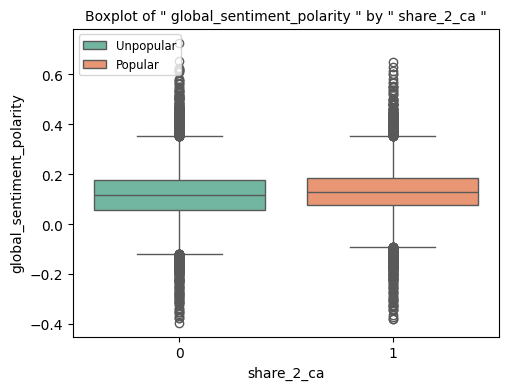

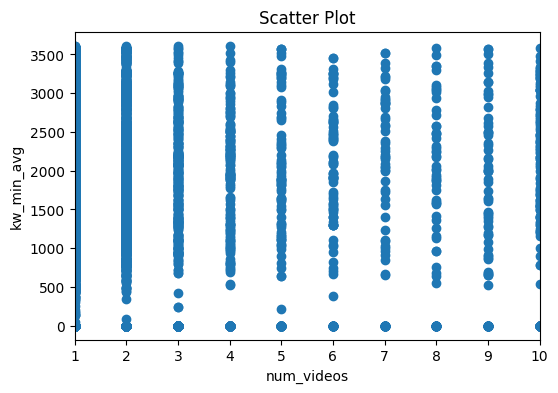

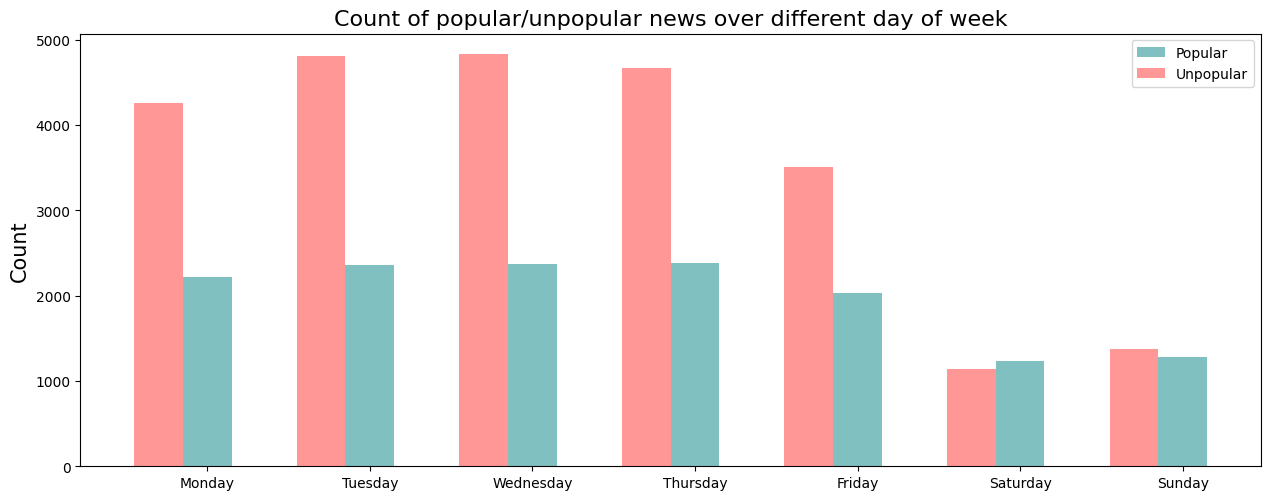

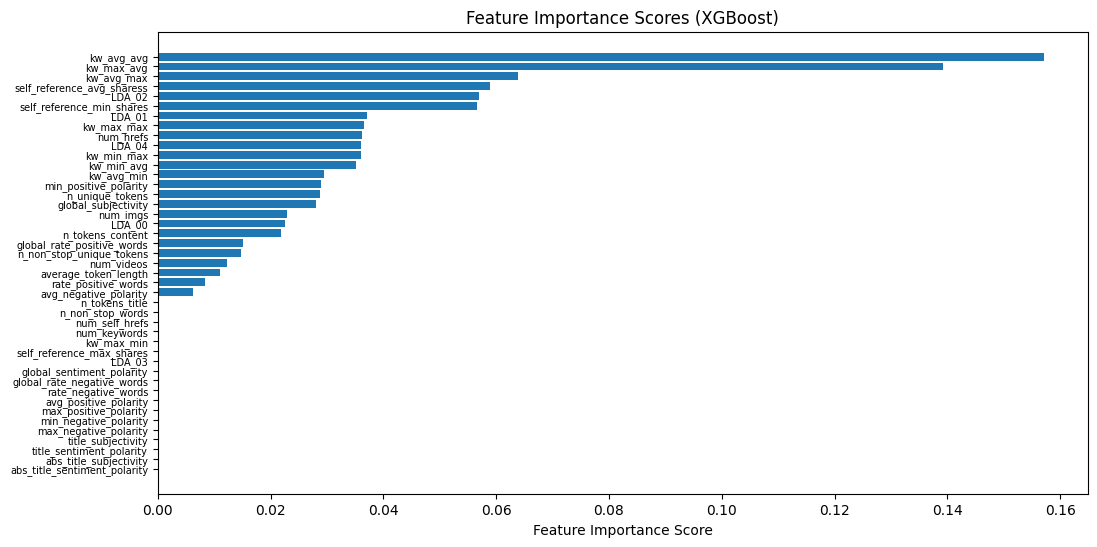

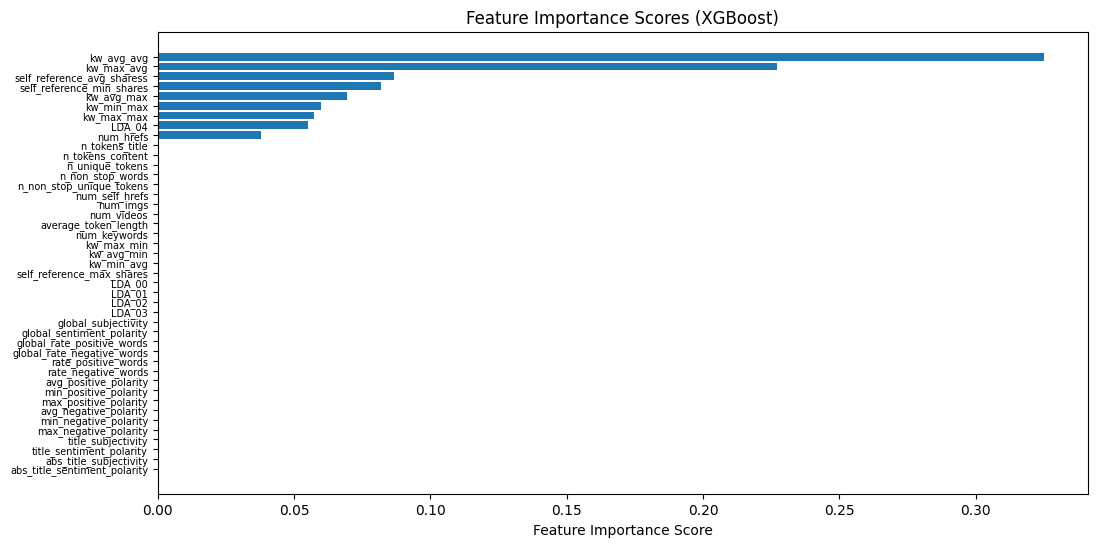

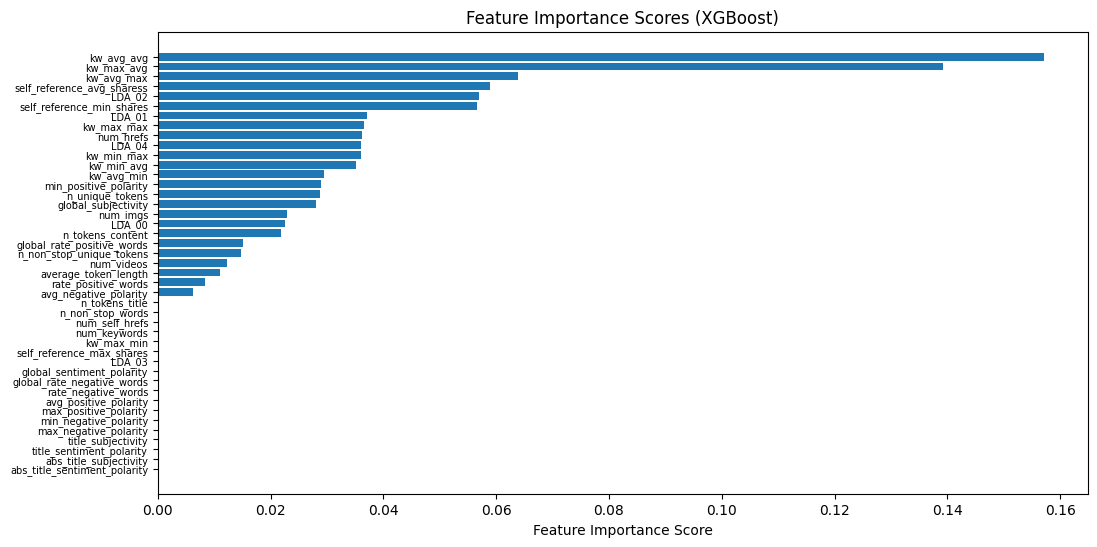

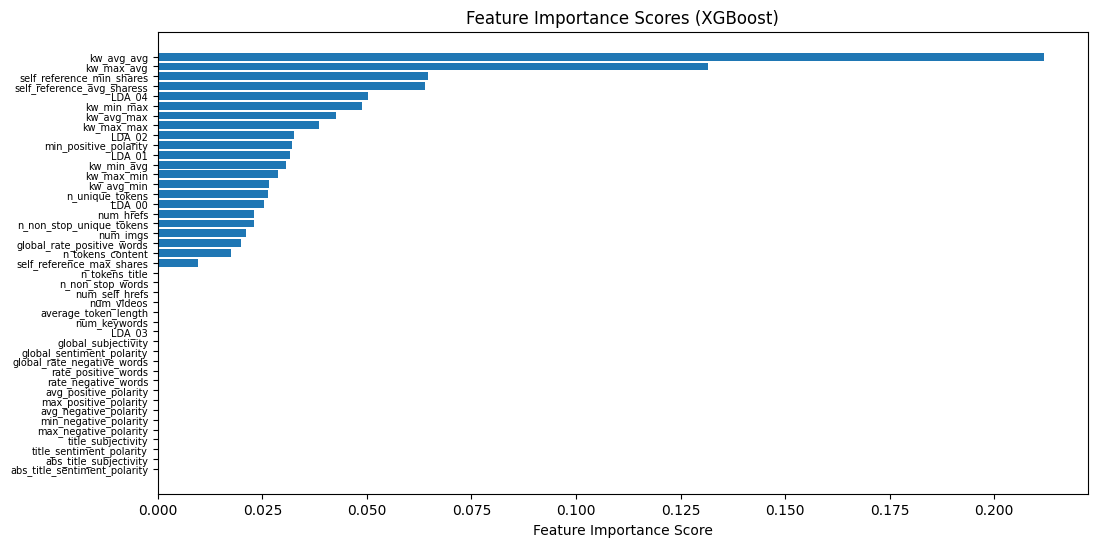

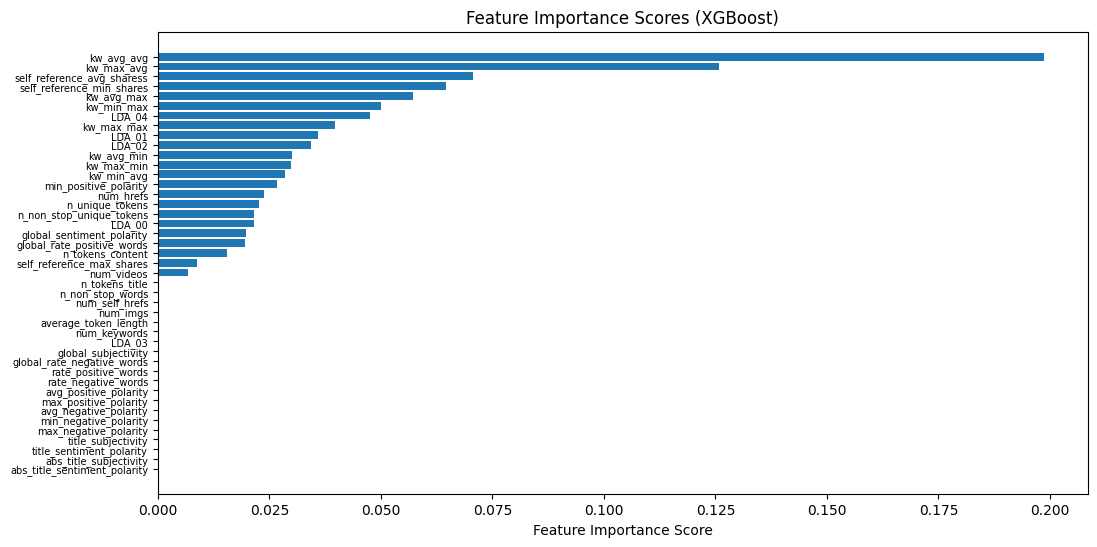

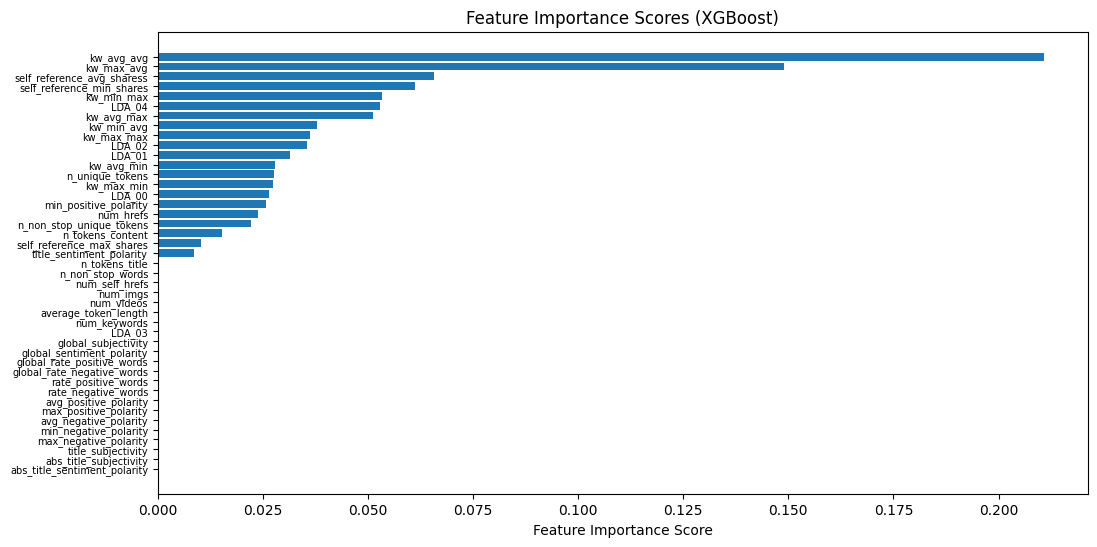

In [30]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

root = tk.Tk()
root.title("Tabbed Interface")

# 创建 Notebook 组件
notebook = ttk.Notebook(root)

# 創建分頁標籤0（連續型變數直方圖和敘述性統計）
tab0 = ttk.Frame(notebook)
notebook.add(tab0, text="Group Comparison")
create_tab0_interface(tab0)

# 創建分頁標籤1（連續型變數散佈圖）
tab1 = ttk.Frame(notebook)
notebook.add(tab1, text="Scatter plot")
create_tab1_interface(tab1)

# 創建分頁標籤2（類別型變數長條圖）
tab2 = ttk.Frame(notebook)
notebook.add(tab2, text="Category Bar Chart")
create_tab2_interface(tab2)

# 創建分頁標籤3（XGboost 模型預測結果）
tab3 = ttk.Frame(notebook)
notebook.add(tab3, text="XGBoost Classifier Result")
create_tab3_interface(tab3)

# 創建分頁標籤4（變數重要性）
tab4 = ttk.Frame(notebook)
notebook.add(tab4, text="Feature Important Score")
create_tab4_interface(tab4)

# 創建分頁標籤5（預測文章是否為熱門文章）
tab5 = ttk.Frame(notebook)
notebook.add(tab5, text="Prediction of Article Popularity")
create_tab5_interface(tab5)

# 将 Notebook 组件放置到主窗口中
notebook.pack(fill="both", expand=True, padx=10, pady=10)

# 运行应用程序
root.mainloop()